In [140]:
import os
import sys
import glob
import zlib
import pickle
import numpy as np
import pandas as pd
import _pickle as cpickle
import matplotlib.pyplot as plt
from importlib import reload
from scipy.ndimage.filters import gaussian_filter
from tensorly.decomposition import non_negative_parafac as nnp

sys.path.append(os.getcwd()+"/scripts/auxiliary/")
import LC_IM_MS_TensorAnalysis as hx

library_info=pd.read_csv("data/library_info/library_info.csv")

timepoints = [0, 10, 16, 26, 40, 65, 105, 160, 270, 430, 690, 1050, 1680, 2640, 4200, 6600, 11400, 18900, 33600, 62220, 100800]
tp_names = ["UN", "10s", "16s", "26s", "40s", "65s", "105s", "160s", "4m30", "7m10", "11m30s", "17m30s", "28m", "44m", "70m", "1hr50", "3hr10", "5hr15", "9hr20", "17hr45", "28hr"]

subset_indices = [14, 94, 95, 96, 97, 98, 99, 100, 101, 102, 160, 161, 162, 233, 234, 235, 236, 264, 265, 266, 267, 268, 269, 304, 390, 476, 477, 478, 542, 681, 846, 891, 
976, 1210,1211, 1212, 1482, 1483, 1484, 1528, 1529, 1530, 1531, 1532, 1861, 2023, 2088, 2089, 2090, 2091, 2092, 2093, 2124, 2144, 2145, 2281, 2282, 2283, 2284, 2285, 2392, 
2416, 2417, 2558, 2803, 2836, 2866, 2885, 2886, 2892, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2972, 2988, 2989, 3219, 3220, 3221, 3249, 3372, 3614, 3697, 3734, 3735, 3736,
3737, 3738, 3739, 3745, 3746, 3747, 3748, 3749, 3840, 3841, 3842, 3843, 3844, 3865, 3978, 3979, 4064, 4065, 4066, 4067, 4074, 4075, 4218, 4219, 4220, 4298, 4299]

In [141]:
def limit_open(fn):
    return cpickle.loads(zlib.decompress(open(fn, "rb").read()))

def driftscope(tensor3):
    #Returns sum of intensities along M/z in shape (rt, dt), shows chromatogram with dt separation. 
    x, y, z = np.shape(tensor3)
    out = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            out[i, j] = np.sum(tensor3[i, j, :])
    return out

def chromatogram(tensor3):
    #Returns sum of intensities along M/z and dt, shows intensity of signal over LC-run period
    x, y, z = np.shape(tensor3)
    out = np.zeros(x)
    
def gauss(tensor3, rt_sig = 3, dt_sig = 1):
    #applies gaussian smoothing to intensities along RT and DT, returns new tensor3
    gauss_grid = np.zeros(np.shape(tensor3))
    for i in range(np.shape(tensor3)[2]):
        gauss_grid[:,:,i] = gaussian_filter(tensor3[:,:,i],(rt_sig, dt_sig))
    return gauss_grid

In [142]:
#Download Percentage
print(sum([len(glob.glob("data/tensors/"+str(line)+"_*"))/23*100 for line in subset_indices])/len(subset_indices))

100.0


In [23]:
po.library_info.iloc[subset_indices]['name'].values[1]

'HEEH_rd2_0093.pdb_5.91308'

In [28]:
po.library_info

,Unnamed: 0,name,RT,im_mono,ab_cluster_total,MW,charge,expect_mz,obs_mz,ppm,...,rt_group_mean_RT_11_0,rt_group_mean_RT_12_0,rt_group_mean_RT_13_0,rt_group_mean_RT_14_0,rt_group_mean_RT_15_0,rt_group_mean_RT_16_0,rt_group_mean_RT_17_0,rt_group_mean_RT_18_0,rt_group_mean_RT_19_0,rt_group_mean_RT_20_0
0,0,HHH_rd4_0891.pdb_4.33802,4.349178,118.225656,207025.7,5649.892150,5.0,1130.985700,1130.986201,0.4,...,4.270273,4.321082,4.338018,4.185593,4.185593,4.219465,4.287210,4.371890,4.168657,4.388826
1,1,HEEH_rd1_0966.pdb_4.37189,4.503763,118.521137,760913.3,5648.896896,5.0,1130.786649,1130.787268,0.5,...,4.304146,4.354954,4.371890,4.219465,4.219465,4.253337,4.321082,4.405762,4.202529,4.433989
2,2,HEEH_rd1_0966.pdb_4.37189,4.453601,101.083382,229392.8,5648.896896,6.0,942.490086,942.491589,1.6,...,4.304146,4.354954,4.371890,4.219465,4.219465,4.253337,4.321082,4.405762,4.202529,4.433989
3,3,HEEH_rd1_0966.pdb_4.37189,4.499586,84.981060,357063.2,5648.896896,7.0,807.992541,807.992048,-0.6,...,4.304146,4.354954,4.371890,4.219465,4.219465,4.253337,4.321082,4.405762,4.202529,4.433989
4,4,HEEH_rd1_0125.pdb_4.41988,4.383614,113.058306,69489.6,5238.760347,4.0,1310.697357,1310.687011,-7.9,...,4.360599,4.411408,4.428344,4.275919,4.275919,4.309791,4.391649,4.462216,4.258983,4.496088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,4306,HHH_rd1_0245.pdb_18.82688,18.757373,91.012273,77575.6,5072.719317,6.0,846.460490,846.463927,4.1,...,18.793003,18.928492,18.860748,18.640578,18.674450,18.750663,18.826875,18.843811,18.623642,18.877684
4307,4307,HHH_rd1_0245.pdb_18.82688,18.919358,80.587976,79822.9,5072.719317,7.0,725.681458,725.679701,-2.4,...,18.793003,18.928492,18.860748,18.640578,18.674450,18.750663,18.826875,18.843811,18.623642,18.877684
4308,4308,HEEH_rd4_0246.pdb_18.86922,19.109474,101.436531,82199.9,5065.691035,6.0,845.289109,845.288475,-0.8,...,18.852279,18.970832,18.903088,18.682918,18.716790,18.793003,18.869216,18.886152,18.665982,18.920024
4309,4309,HHH_rd4_0269.pdb_18.98777,19.004371,124.147824,64920.9,6123.235948,5.0,1225.654460,1225.656707,1.8,...,18.970832,19.089385,19.021641,18.801471,18.835343,18.970832,18.987768,19.004705,18.784535,19.038577


In [143]:
#RT-group ic-creation percentage
y, n = 0, 0 
missing_rt_groups = []
for i in range(len(subset_indices)):
    name = po.library_info.iloc[subset_indices[i]]['name']
    if len(glob.glob('data/ic_time_series/'+name+"_all_tp_clusters.cpickle.zlib")) > 0: 
        y += 1
    else:
        n += 1
        missing_rt_groups.append(subset_indices[i])

print(y/(y+n)*100)

100.0


In [41]:
missing_rt_groups

[2392,
 2416,
 2417,
 2558,
 2803,
 2836,
 2866,
 2885,
 2886,
 2892,
 2964,
 2965,
 2966,
 2967,
 2968,
 2969,
 2970,
 2972,
 2988,
 2989,
 3219,
 3220,
 3221,
 3249,
 3372,
 3614,
 3697,
 3734,
 3735,
 3736,
 3737,
 3738,
 3739,
 3745,
 3746,
 3747,
 3748,
 3749,
 3840,
 3841,
 3842,
 3843,
 3844,
 3865,
 3978,
 3979,
 4064,
 4065,
 4066,
 4067,
 4074,
 4075,
 4218,
 4219,
 4220,
 4298,
 4299]

In [42]:
#Generate rt-group ics
for line in missing_rt_groups:
    paths = glob.glob("data/tensors/"+str(line)+"_*")    
    tp_inputs = [[fn for fn in paths if tp_name in fn] for tp_name in tp_names]
    name = library_info.iloc[line]['name']

    t = hx.TensorGenerator(name, library_info, tp_inputs, timepoints)
    t.generate_tensors()
    hx.limit_write(t.all_tp_clusters, "data/ic_time_series/"+t.name+"_all_tp_clusters.cpickle.zlib")

Starting 0 seconds, 1 of 21
Sourcefile: data/tensors/2392_180604_Mix2_MES_nonlin_UN2.mzML.gz.cpickle.zlib, 1 of 3
File: data/tensors/2392_180604_Mix2_MES_nonlin_UN2.mzML.gz.cpickle.zlib
1 of 3 T+1.0833320617675781
2 of 3 T+4.239073753356934
3 of 3 T+6.2761852741241455
Sourcefile: data/tensors/2392_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib, 2 of 3
File: data/tensors/2392_180604_Mix2_MES_nonlin_UN.mzML.gz.cpickle.zlib
1 of 3 T+0.9418487548828125
2 of 3 T+4.339291095733643
3 of 3 T+6.354033946990967
Sourcefile: data/tensors/2392_180604_Mix2_MES_nonlin_UN3.mzML.gz.cpickle.zlib, 3 of 3
File: data/tensors/2392_180604_Mix2_MES_nonlin_UN3.mzML.gz.cpickle.zlib
1 of 3 T+0.8827362060546875
2 of 3 T+4.387493848800659
3 of 3 T+6.228442907333374
Starting 10 seconds, 2 of 21
Sourcefile: data/tensors/2392_180604_Mix2_MES_nonlin_10s.mzML.gz.cpickle.zlib, 1 of 1
File: data/tensors/2392_180604_Mix2_MES_nonlin_10s.mzML.gz.cpickle.zlib
1 of 3 T+0.9111948013305664
2 of 3 T+2.5407588481903076
3 of 3 T+4

In [8]:
po.old_data[0].keys()

dict_keys(['output', 'input_RTs', 'input_DTs', 'peak_centroids', 'integrated_intensities', 'total_intensity', 'centroid', 'undeut_centroid', 'major_species', 'major_species_integrated_intensities', 'major_species_median', 'major_species_total_intensity', 'major_species_centroid', 'interference_height_ratio', 'interference_integral_ratio', 'max_interference_integral_ratio', 'charge', 'delta_mz_rate', 'major_species_widths', 'fit_to_theo_dist'])

In [7]:
len(po.old_data[0]['centroid'])

20

In [13]:
po.old_data[0].keys

<function dict.keys>

In [16]:
po.old_data[0]['major_species_centroid']

[3.251972179723864,
 3.175067858021797,
 3.204267755375467,
 38.14913715376067,
 38.23125566395157,
 38.56908875315773,
 38.397587050871266,
 38.47884401442547,
 38.32830527901883,
 38.03222244534645,
 38.381431797550526,
 38.673921031061866,
 37.938645556788146,
 38.738312281457084,
 37.660347396423084,
 38.47781225839132,
 38.66313214147546,
 38.902082753556066,
 38.495655139991804,
 38.97782639405733,
 38.06400942380841,
 38.708837925018734,
 38.13928573106946]

In [10]:
for key in po.old_data[0].keys():
    print(key)
    print(len(po.old_data[0][key]))

output
23
input_RTs
23
input_DTs
23
peak_centroids
23
integrated_intensities
23
total_intensity
23
centroid
20
undeut_centroid
23
major_species
23
major_species_integrated_intensities
23
major_species_median
23
major_species_total_intensity
23
major_species_centroid
23
interference_height_ratio
23
interference_integral_ratio
23
max_interference_integral_ratio


TypeError: object of type 'numpy.float64' has no len()

In [3]:
for i in range(len(po.old_data)):
    plt.plot(po.old_data[i]['added_mass_centroid'])

KeyError: 'added_mass_centroid'

In [9]:
subset_names = po.library_info.iloc[subset_indices]['name'].values

In [ ]:
err_idx = 

In [2]:
#PO and bokeh plot
for line in subset_indices[:2]:
    
    name = library_info.iloc[line]['name']
    
    all_tp_clusters = hx.limit_read("data/ic_time_series/"+library_info.iloc[line]['name']+"_all_tp_clusters.cpickle.zlib")
    
    po = hx.PathOptimizer(name, all_tp_clusters, library_info, timepoints, n_undeut_runs = 3, old_data_dir = "/Users/rwl0960/Documents/hdx/local_LIMIT/data/old_data/")

    po.optimize_paths()

    source_frame, old_df = po.bokeh_plot("plots/"+name+"_time_series.html")

internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=3753, glyph=Line(id='3751', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=3762, glyph=Line(id='3759', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=11527, glyph=Line(id='11525', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=11536, glyph=Line(id='11533', ...), ...)


Use undeut_grounds to pick best undeut-fit old charge to use for rmse of undeuts? Keeping all is better, display with undeut fit value. Potentially automate decision for scoring later

In [ ]:
glob.glob()

In [30]:
dir(po)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'all_tp_clusters',
 'auc_ground_rmse',
 'auc_ground_rmse_weight',
 'baseline_peak_error',
 'baseline_peak_error_weight',
 'bokeh_plot',
 'clusters_close_to_line',
 'combo_score',
 'delta_mz_rate',
 'delta_mz_rate_weight',
 'dt_com_cv',
 'dt_error_rmse',
 'dt_ground_fit',
 'dt_ground_fit_weight',
 'dt_ground_rmse',
 'dt_ground_rmse_weight',
 'filter_runners',
 'filtered_runners',
 'find_runners',
 'gabe_delta_mz_rate',
 'gather_old_data',
 'generate_sample_paths',
 'int_mz_rot_fit',
 'int_mz_rot_fit_weight',
 'int_mz_std_rmse',
 'int_mz_std_rmse_weight',
 'library_info',
 'max_peak_center',
 'n_undeut_runs',
 'name',
 'old

In [7]:
po.old_data[0].keys()

dict_keys(['output', 'input_RTs', 'input_DTs', 'peak_centroids', 'integrated_intensities', 'total_intensity', 'centroid', 'undeut_centroid', 'major_species', 'major_species_integrated_intensities', 'major_species_median', 'major_species_total_intensity', 'major_species_centroid', 'interference_height_ratio', 'interference_integral_ratio', 'max_interference_integral_ratio', 'charge', 'delta_mz_rate', 'major_species_widths', 'fit_to_theo_dist'])

In [24]:
len(po.old_data[0]['major_species_centroid']), len(po.winner)

(23, 21)

In [32]:
type(po.winner[0].baseline_integrated_mz_com), type(po.old_data[0]['major_species_centroid'][0])

(numpy.float64, numpy.float64)

In [35]:
display(po.old_undeut_ground_dot_products)

{5: array([0.9975655]), 6: array([0.99681928, 0.80458327])}

In [39]:
len(po.old_data[0]['major_species_centroid']), len(po.winner)

(23, 21)

In [139]:
def old_com_errors(self):
    #Calculate amu distances between a single new rt-group path, and all old-data charges
    
    if hasattr(self, 'old_data') and hasattr(self, 'winner'): #only after po has run
        old = self.old_data
        new = self.winner
        
        out = [] 
        for i in range(len(new)):
            charge_errs = []
            new_mz_cen = new[i].baseline_integrated_mz_com
            for charge in old:
                if i == 0: 
                    for j in range(3):
                        old_mz_cen = charge['major_species_centroid'][j]
                        charge_errs.append(new_mz_cen-old_mz_cen) #negative: old is higher mass, positive: old is lower mass
                else:
                    old_mz_cen = charge['major_species_centroid'][i+2]
                    charge_errs.append(new_mz_cen-old_mz_cen)
            
            out.append(charge_errs)
        return out
    
    else: 
        print('fail')

        
def old_com_rmse(self):
    #Calculates timepoint-wise rmse for all old-data charges
    
    if hasattr(self, 'old_data') and hasattr(self, 'winner'): #only after po has run
        errs = old_com_errors(self)
        n_charges = len(self.old_data)
        
        rmses = []
        for tp in errs:
            if tp == 0:
                rmses.append(np.sqrt(sum([min([errs[0][n_charges*i:(n_charges*i)+n_charges]])])))
            else:
                rmses.append(np.sqrt(sum([i**2 for i in tp])))

        return rmses
    
    else: 
        print('fail')
        
        
def old_com_charge_errors(self):
    #Packs b_int_mz_com error into arrays for each old charge-state
    
    if hasattr(self, 'old_data') and hasattr(self, 'winner'): #only after po has run
        errs = old_com_errors(self)
        n_charges = len(self.old_data)
        
        charges = []
        for i in range(n_charges):
            charge_errs = []
            for tp in range(len(errs)):
                if tp == 0: 
                    charge_errs.append(min(errs[0][(3*i):(3*i)+3]))
                    
                else: 
                    charge_errs.append(errs[tp][i])
                
            charges.append(charge_errs)

        return charges
    
    else: 
        print('fail')
        
        
def old_com_charge_rmsds(self):
    #Calculates rmse for each old charge-state
    
    if hasattr(self, 'old_data') and hasattr(self, 'winner'):
        charge_errors = old_com_charge_errors(self)
        
        return [np.sqrt(np.avg([i**2 for i in charge])) for charge in charge_errors]
        

In [113]:
rmse = old_com_rmse(po)

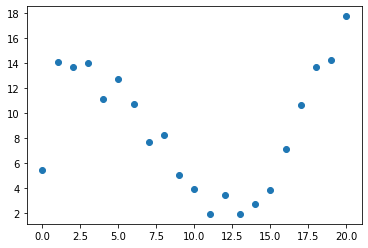

In [114]:
plt.scatter(range(len(rmse)), rmse)

In [104]:
def old_data_info_df(self):
    if hasattr(self, 'old_data') and hasattr(self, 'winner'): #after po has run
        old = self.old_data
        new = self.winner
        
        source = self.old_files
        rt_group = [self.name for i in old]
        charges = [int(i.split('z')[1][0]) for i in self.old_files]
        
        old_idotp = []
        for charge in self.old_undeut_ground_dot_products.keys():
            for i in range(len(self.old_undeut_ground_dot_products[charge])):
                old_idotp.append(self.old_undeut_ground_dot_products[charge][i])
                
        new_idotp = []
        for charge in charges:
            for c in sorted(list(self.undeut_ground_dot_products.keys())):
                new_idotp.append(self.undeut_ground_dot_products[c])
        
        rmsd = old_com_charge_rmsds(self)
        errors = old_com_charge_errors(self)
        
        df = pd.DataFrame.from_dict({
            'source': source,
            'rt_group': rt_group,
            'charge': charges,
            'old_idotp': old_idotp,
            'new_idotp': new_idotp,
            'old_vs_new_mz_com_rmsd': rmsd,
            'old_vs_new_mz_com_errors': errors
        })
        
        return(df)
        
    else:
        print(fail)

In [276]:
for line in subset_indices:
    print(line,len(glob.glob('data/old_data/*_'+'_'.join(library_info.iloc[line]['name'].split("/")[-1].split("_")[:3])+"_*")))

14 0
94 3
95 3
96 3
97 3
98 3
99 2
100 2
101 2
102 2
160 1
161 1
162 1
233 2
234 2
235 2
236 2
264 2
265 2
266 2
267 2
268 2
269 2
304 0
390 1
476 2
477 2
478 2
542 1
681 8
846 3
891 1
976 0
1210 3
1211 3
1212 3
1482 3
1483 3
1484 3
1528 4
1529 4
1530 4
1531 4
1532 4
1861 1
2023 0
2088 2
2089 2
2090 2
2091 2
2092 2
2093 2
2124 3
2144 2
2145 2
2281 2
2282 2
2283 2
2284 2
2285 2
2392 2
2416 3
2417 3
2558 0
2803 3
2836 2
2866 3
2885 0
2886 0
2892 1
2964 3
2965 3
2966 3
2967 3
2968 3
2969 3
2970 2
2972 3
2988 5
2989 5
3219 4
3220 4
3221 4
3249 2
3372 3
3614 1
3697 1
3734 4
3735 4
3736 4
3737 4
3738 4
3739 4
3745 2
3746 2
3747 2
3748 2
3749 2
3840 2
3841 2
3842 2
3843 2
3844 2
3865 2
3978 1
3979 1
4064 5
4065 5
4066 5
4067 5
4074 1
4075 1
4218 5
4219 3
4220 3
4298 1
4299 1


In [275]:
'_'.join(library_info.iloc[line]['name'].split("/")[-1].split("_")[:3])

'HEEH_rd1_0639.pdb'

In [105]:
for line in subset_indices:
    
    if len(glob.glob('data/old_data/*_'+'_'.join(library_info.iloc[line]['name'].split("/")[-1].split("_")[:3])+"_*")) > 0:
        
        name = library_info.iloc[line]['name']

        all_tp_clusters = hx.limit_read("data/ic_time_series/"+library_info.iloc[line]['name']+"_all_tp_clusters.cpickle.zlib")

        po = hx.PathOptimizer(name, all_tp_clusters, library_info, timepoints, n_undeut_runs = 3, old_data_dir = "data/old_data/")

        po.optimize_paths()
        
        source_frame, old_df = po.bokeh_plot("plots/"+name+"_time_series.html")

        if len(po.old_data) > 0:
            df = old_data_info_df(po)
            hx.limit_write(df, "tables/"+str(line)+"_po_table.cpickle.zlib")

old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1294237, glyph=Line(id='1294235', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1294246, glyph=Line(id='1294243', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1302011, glyph=Line(id='1302009', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1302020, glyph=Line(id='1302017', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1309785, glyph=Line(id='1309783', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1309794, glyph=Line(id='1309791', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1317559, glyph=Line(id='1317557', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1317568, glyph=Line(id='1317565', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1325333, glyph=Line(id='1325331', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1325342, glyph=Line(id='1325339', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1333107, glyph=Line(id='1333105', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1333116, glyph=Line(id='1333113', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1340881, glyph=Line(id='1340879', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1340890, glyph=Line(id='1340887', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1348655, glyph=Line(id='1348653', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1348664, glyph=Line(id='1348661', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1356429, glyph=Line(id='1356427', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1356438, glyph=Line(id='1356435', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1364203, glyph=Line(id='1364201', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1364212, glyph=Line(id='1364209', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1371977, glyph=Line(id='1371975', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1371986, glyph=Line(id='1371983', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1379751, glyph=Line(id='1379749', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1379760, glyph=Line(id='1379757', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1387525, glyph=Line(id='1387523', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1387534, glyph=Line(id='1387531', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1395299, glyph=Line(id='1395297', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1395308, glyph=Line(id='1395305', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1403073, glyph=Line(id='1403071', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1403082, glyph=Line(id='1403079', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1410847, glyph=Line(id='1410845', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1410856, glyph=Line(id='1410853', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1418621, glyph=Line(id='1418619', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1418630, glyph=Line(id='1418627', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1426395, glyph=Line(id='1426393', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1426404, glyph=Line(id='1426401', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1434169, glyph=Line(id='1434167', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1434178, glyph=Line(id='1434175', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1441943, glyph=Line(id='1441941', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1441952, glyph=Line(id='1441949', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1449717, glyph=Line(id='1449715', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1449726, glyph=Line(id='1449723', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1457491, glyph=Line(id='1457489', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1457500, glyph=Line(id='1457497', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1465265, glyph=Line(id='1465263', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1465274, glyph=Line(id='1465271', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1473039, glyph=Line(id='1473037', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1473048, glyph=Line(id='1473045', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1480813, glyph=Line(id='1480811', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1480822, glyph=Line(id='1480819', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1488587, glyph=Line(id='1488585', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1488596, glyph=Line(id='1488593', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1496361, glyph=Line(id='1496359', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1496370, glyph=Line(id='1496367', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1504135, glyph=Line(id='1504133', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1504144, glyph=Line(id='1504141', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1511909, glyph=Line(id='1511907', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1511918, glyph=Line(id='1511915', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1519683, glyph=Line(id='1519681', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1519692, glyph=Line(id='1519689', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1527457, glyph=Line(id='1527455', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1527466, glyph=Line(id='1527463', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1535231, glyph=Line(id='1535229', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1535240, glyph=Line(id='1535237', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1543005, glyph=Line(id='1543003', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1543014, glyph=Line(id='1543011', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1550779, glyph=Line(id='1550777', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1550788, glyph=Line(id='1550785', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1558553, glyph=Line(id='1558551', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1558562, glyph=Line(id='1558559', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1566327, glyph=Line(id='1566325', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1566336, glyph=Line(id='1566333', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1574101, glyph=Line(id='1574099', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1574110, glyph=Line(id='1574107', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1581875, glyph=Line(id='1581873', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1581884, glyph=Line(id='1581881', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1589649, glyph=Line(id='1589647', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1589658, glyph=Line(id='1589655', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1597423, glyph=Line(id='1597421', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1597432, glyph=Line(id='1597429', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1605197, glyph=Line(id='1605195', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1605206, glyph=Line(id='1605203', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1612971, glyph=Line(id='1612969', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1612980, glyph=Line(id='1612977', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1620745, glyph=Line(id='1620743', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1620754, glyph=Line(id='1620751', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1628519, glyph=Line(id='1628517', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1628528, glyph=Line(id='1628525', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1636293, glyph=Line(id='1636291', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1636302, glyph=Line(id='1636299', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1644067, glyph=Line(id='1644065', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1644076, glyph=Line(id='1644073', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1651841, glyph=Line(id='1651839', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1651850, glyph=Line(id='1651847', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1659615, glyph=Line(id='1659613', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1659624, glyph=Line(id='1659621', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1667389, glyph=Line(id='1667387', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1667398, glyph=Line(id='1667395', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1675163, glyph=Line(id='1675161', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1675172, glyph=Line(id='1675169', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1682937, glyph=Line(id='1682935', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1682946, glyph=Line(id='1682943', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1690711, glyph=Line(id='1690709', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1690720, glyph=Line(id='1690717', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1698485, glyph=Line(id='1698483', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1698494, glyph=Line(id='1698491', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1706259, glyph=Line(id='1706257', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1706268, glyph=Line(id='1706265', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1714033, glyph=Line(id='1714031', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1714042, glyph=Line(id='1714039', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1721807, glyph=Line(id='1721805', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1721816, glyph=Line(id='1721813', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1729581, glyph=Line(id='1729579', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1729590, glyph=Line(id='1729587', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1737355, glyph=Line(id='1737353', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1737364, glyph=Line(id='1737361', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1745129, glyph=Line(id='1745127', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1745138, glyph=Line(id='1745135', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1752903, glyph=Line(id='1752901', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1752912, glyph=Line(id='1752909', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1760677, glyph=Line(id='1760675', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1760686, glyph=Line(id='1760683', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1768451, glyph=Line(id='1768449', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1768460, glyph=Line(id='1768457', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1776225, glyph=Line(id='1776223', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1776234, glyph=Line(id='1776231', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1783999, glyph=Line(id='1783997', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1784008, glyph=Line(id='1784005', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1791773, glyph=Line(id='1791771', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1791782, glyph=Line(id='1791779', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1799547, glyph=Line(id='1799545', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1799556, glyph=Line(id='1799553', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1807321, glyph=Line(id='1807319', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1807330, glyph=Line(id='1807327', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1815095, glyph=Line(id='1815093', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1815104, glyph=Line(id='1815101', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1822869, glyph=Line(id='1822867', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1822878, glyph=Line(id='1822875', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1830643, glyph=Line(id='1830641', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1830652, glyph=Line(id='1830649', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1838417, glyph=Line(id='1838415', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1838426, glyph=Line(id='1838423', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1846191, glyph=Line(id='1846189', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1846200, glyph=Line(id='1846197', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1853965, glyph=Line(id='1853963', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1853974, glyph=Line(id='1853971', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1861739, glyph=Line(id='1861737', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1861748, glyph=Line(id='1861745', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1869513, glyph=Line(id='1869511', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1869522, glyph=Line(id='1869519', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1877287, glyph=Line(id='1877285', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1877296, glyph=Line(id='1877293', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1885061, glyph=Line(id='1885059', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1885070, glyph=Line(id='1885067', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1892835, glyph=Line(id='1892833', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1892844, glyph=Line(id='1892841', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1900609, glyph=Line(id='1900607', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1900618, glyph=Line(id='1900615', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1908383, glyph=Line(id='1908381', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1908392, glyph=Line(id='1908389', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1916157, glyph=Line(id='1916155', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1916166, glyph=Line(id='1916163', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1923931, glyph=Line(id='1923929', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1923940, glyph=Line(id='1923937', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1931705, glyph=Line(id='1931703', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1931714, glyph=Line(id='1931711', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1939479, glyph=Line(id='1939477', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1939488, glyph=Line(id='1939485', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1947253, glyph=Line(id='1947251', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1947262, glyph=Line(id='1947259', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1955027, glyph=Line(id='1955025', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1955036, glyph=Line(id='1955033', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1962801, glyph=Line(id='1962799', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1962810, glyph=Line(id='1962807', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1970575, glyph=Line(id='1970573', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1970584, glyph=Line(id='1970581', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1978349, glyph=Line(id='1978347', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1978358, glyph=Line(id='1978355', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1986123, glyph=Line(id='1986121', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1986132, glyph=Line(id='1986129', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1993897, glyph=Line(id='1993895', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=1993906, glyph=Line(id='1993903', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2001671, glyph=Line(id='2001669', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2001680, glyph=Line(id='2001677', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2009445, glyph=Line(id='2009443', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2009454, glyph=Line(id='2009451', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2017219, glyph=Line(id='2017217', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2017228, glyph=Line(id='2017225', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2024993, glyph=Line(id='2024991', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2025002, glyph=Line(id='2024999', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2032767, glyph=Line(id='2032765', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2032776, glyph=Line(id='2032773', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2040541, glyph=Line(id='2040539', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2040550, glyph=Line(id='2040547', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2048315, glyph=Line(id='2048313', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2048324, glyph=Line(id='2048321', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2056089, glyph=Line(id='2056087', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2056098, glyph=Line(id='2056095', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2063863, glyph=Line(id='2063861', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2063872, glyph=Line(id='2063869', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2071637, glyph=Line(id='2071635', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2071646, glyph=Line(id='2071643', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2079411, glyph=Line(id='2079409', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2079420, glyph=Line(id='2079417', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2087185, glyph=Line(id='2087183', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2087194, glyph=Line(id='2087191', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2094959, glyph=Line(id='2094957', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2094968, glyph=Line(id='2094965', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2102733, glyph=Line(id='2102731', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2102742, glyph=Line(id='2102739', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2110507, glyph=Line(id='2110505', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2110516, glyph=Line(id='2110513', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2118281, glyph=Line(id='2118279', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2118290, glyph=Line(id='2118287', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2126055, glyph=Line(id='2126053', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2126064, glyph=Line(id='2126061', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2133829, glyph=Line(id='2133827', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2133838, glyph=Line(id='2133835', ...), ...)


old_data timepoints: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
internal n_timepoints: 21


ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2141603, glyph=Line(id='2141601', ...), ...)
ERROR:bokeh.core.validation.check:E-1024 (CDSVIEW_FILTERS_WITH_CONNECTED): CDSView filters are not compatible with glyphs with connected topology such as Line or Patch: GlyphRenderer(id=2141612, glyph=Line(id='2141609', ...), ...)


In [106]:
dfs = []
for fn in sorted(glob.glob("tables/*"), key = lambda x: int(x.split('/')[-1].split('_')[0]), reverse=True):
    dfs.append(hx.limit_read(fn))

In [107]:
big_df = pd.concat(dfs)

In [108]:
big_df.to_csv("HDX_LIMIT_n_110_subset_08_06_2020.csv")

In [111]:
import seaborn as sns

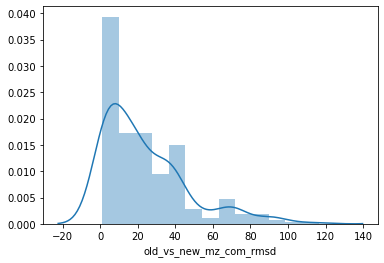

In [113]:
sns.distplot(big_df['old_vs_new_mz_com_rmsd'])

In [133]:
big_df['old_vs_new_mz_com_errors'].values[0]

[-3.2066748427673213,
 -4.144017635706228,
 -0.15030879676846887,
 0.9242673585165839,
 -0.42057744420620224,
 1.2183067543689816,
 -0.7164427914982028,
 -0.22699750259926077,
 0.5480791069381326,
 2.356940462070156,
 4.7144685912299025,
 2.501292708601504,
 1.9110752067863253,
 0.19099332706439043,
 3.914805859746732,
 4.1639079689445815,
 -5.135576404486976,
 -3.701189651998149,
 0.008006941657804134,
 1.3021708990478444,
 1.9163649947588084]

In [ ]:
for i in range(len(big_df['old_vs_new_mz_com_errors'].values))

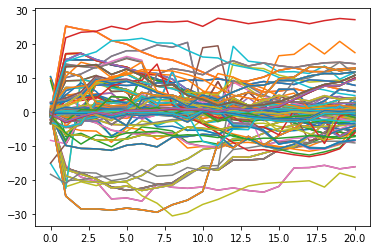

In [136]:
for i in range(len(big_df['old_vs_new_mz_com_errors'].values)):
    plt.plot(big_df['old_vs_new_mz_com_errors'].values[i])

In [138]:
for i in range(len(big_df)):
    po.library_info.loc[po.library_info['name'] == ]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

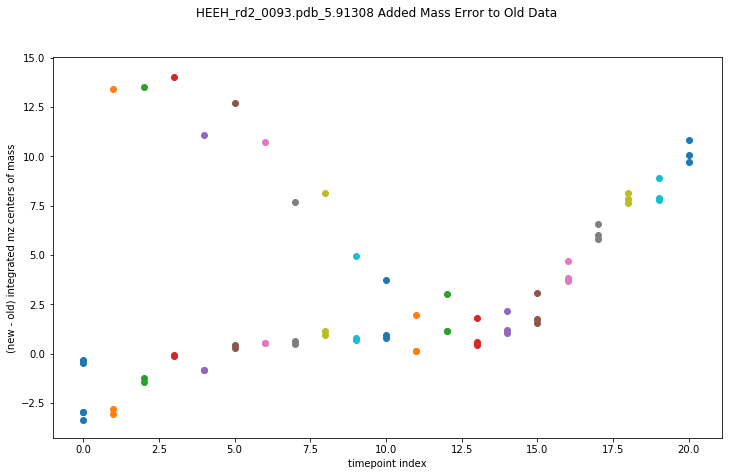

In [115]:
#error to new data, show undeut fits because the new may be worse

plt.figure(figsize=(12,7))
plt.suptitle(po.name+" Added Mass Error to Old Data")
for tp in range(len(errs)):
    plt.scatter([tp for i in errs[tp]], errs[tp])
    
plt.xlabel("timepoint index")
plt.ylabel('(new - old) integrated mz centers of mass')
plt.show()
plt.close()

In [16]:
subset_names = list(library_info.iloc[subset_indices]['name'].values)

count = 0
for name in subset_names:
    if len(list(glob.glob("data/ic_time_series/"+name+"_all_tp_clusters.cpickle.zlib"))) > 0:
        count += 1

In [30]:
count/116*100

51.724137931034484

In [10]:
for key in old_df.keys():
    print(key+" "+str(len(old_df[key])))

added_mass_centroid 63
added_mass_width 63
added_mass_xs 63
centroid 63
charge 63
delta_mz_rate 63
fit_to_theo_dist 63
int_mz_xs 63
int_mz_ys 63
lowers 63
major_species_integrated_intensities 63
major_species_widths 63
timepoint 63
type 63
uppers 63


In [11]:
for key in source_frame.keys():
    print(key+" "+str(len(source_frame[key])))

source_file 209
tensor_idx 209
n_factors 209
factor_idx 209
cluster_idx 209
charge_states 209
n_concatenated 209
mz_bin_low 209
mz_bin_high 209
baseline_subtracted_area_under_curve 209
baseline_subtracted_grate_sum 209
baseline_subtracted_peak_error 209
baseline_integrated_mz_com 209
abs_mz_com 209
rt 209
dt 209
int_mz_x 209
int_mz_y 209
rt_ground_err 209
dt_ground_err 209
int_mz_std_rmse 209
delta_mz_rate 209
dt_ground_rmse_score 209
rt_ground_rmse_score 209
dt_ground_fit 209
rt_ground_fit 209
baseline_peak_error 209
auc_ground_rmse 209
net_score_difference 209
timepoint 209
upper_added_mass 209
lower_added_mass 209
winner_or_runner 209
rtxdt_err 209
rtxdt_rmse 209
whisker_x 209
whisker_y 209


In [12]:
source_frame

,source_file,tensor_idx,n_factors,factor_idx,cluster_idx,charge_states,n_concatenated,mz_bin_low,mz_bin_high,baseline_subtracted_area_under_curve,...,auc_ground_rmse,net_score_difference,timepoint,upper_added_mass,lower_added_mass,winner_or_runner,rtxdt_err,rtxdt_rmse,whisker_x,whisker_y
0,data/tensors/846_180604_Mix2_MES_nonlin_UN.mzM...,846,3,0,0,[5.0],1,1031,1771,12.262264,...,7.953500,0.000000,0,7,1,0,0.000000,0.29925,"[0, 0]","[1, 7]"
1,data/tensors/846_180604_Mix2_MES_nonlin_26s.mz...,846,2,0,0,[5.0],1,2942,4388,14.238509,...,7.953500,0.000000,1,33,20,0,0.000013,0.29925,"[1, 1]","[20, 33]"
2,data/tensors/846_180604_Mix2_MES_nonlin_40s.mz...,846,3,0,0,[5.0],1,3446,4790,16.380192,...,7.953500,0.000000,2,37,25,0,0.025863,0.29925,"[2, 2]","[25, 37]"
3,data/tensors/846_180604_Mix2_MES_nonlin_65s.mz...,846,2,0,0,[5.0],1,3446,4992,15.751035,...,7.953500,0.000000,3,39,25,0,0.022993,0.29925,"[3, 3]","[25, 39]"
4,data/tensors/846_180604_Mix2_MES_nonlin_105s.m...,846,1,0,0,[5.0],1,3446,5193,11.409937,...,7.953500,0.000000,4,41,25,0,0.052690,0.29925,"[4, 4]","[25, 41]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,data/tensors/846_180604_Mix2_MES_nonlin_28hr.m...,846,3,2,1,[5.0],1,5458,6300,4.233255,...,-1.370794,-30.749445,18,52,45,1,0.188004,NA,"[18, 18]","[45, 52]"
205,data/tensors/846_180604_Mix2_MES_nonlin_28hr.m...,846,2,0,2,[5.0],1,5257,6904,13.660658,...,0.275267,-34.657100,18,58,43,1,0.082362,NA,"[18, 18]","[43, 58]"
206,data/tensors/846_180604_Mix2_MES_nonlin_28hr.m...,846,2,0,3,[5.0],1,5257,6904,13.660658,...,0.275267,-34.657100,18,58,43,1,0.082362,NA,"[18, 18]","[43, 58]"
207,data/tensors/846_180604_Mix2_MES_nonlin_28hr.m...,846,3,0,3,[5.0],1,4955,6803,17.875495,...,0.065844,-36.431240,18,57,40,1,0.485063,NA,"[18, 18]","[40, 57]"


In [6]:
old_files = ['/Users/rwl0960/Documents/hdx/local_LIMIT/data/old_data/mix2_MES_n_447_EEHEE_rd4_0403.pdb_z5.0.pickle', '/Users/rwl0960/Documents/hdx/local_LIMIT/data/old_data/mix2_MES_n_448_EEHEE_rd4_0403.pdb_z5.0.pickle', '/Users/rwl0960/Documents/hdx/local_LIMIT/data/old_data/mix2_MES_n_449_EEHEE_rd4_0403.pdb_z6.0.pickle']

In [7]:
out = []
for item in glob.iglob('data/old_data/*EEHEE_rd4_0403*.pickle'):
    with open(item, 'rb') as file:
        this = pickle.load(file)
        out.append((len(this['centroid']),len(this['major_species_centroid'])))

In [27]:
def winner_added_mass_plotter(source, tooltips, old_source = None):
            p = figure(title = 'Winning Timeseries Mean Added-Mass, Colored by RTxDT Error in ms', plot_height = 400, plot_width = 1275, background_fill_color = 'whitesmoke', x_range = (-1, max([int(tp) for tp in source.data['timepoint']])+1), tools = 'pan,wheel_zoom,reset,help', tooltips = tooltips)
            winner_view = CDSView(source = source, filters = [GroupFilter(column_name = "winner_or_runner", group = str(0))])
            err_mapper = linear_cmap(field_name = 'rtxdt_err', palette = Spectral6, low = 0, high = 1)
            color_bar = ColorBar(color_mapper = err_mapper['transform'], width = 10,  location = (0,0))
            
            #Get mean value from source and map value to Spectral6
            mean_rtxdt_err = source.data['rtxdt_err'][0]
            mean_color = manual_cmap(mean_rtxdt_err, 0, 2, Spectral6)
            p.line(x = 'timepoint', y = 'baseline_integrated_mz_com', line_color = mean_color, source = source, view = winner_view,  line_width = 3)
            p.circle(x = 'timepoint', y = 'baseline_integrated_mz_com', source = source, view = winner_view, line_color = err_mapper, color = err_mapper, fill_alpha = 1, size = 12)
            p.add_layout(Whisker(source = source, base = "timepoint", upper = "upper_added_mass", lower = "lower_added_mass"))

            if old_source is not None: #plot added-masses of all charges of protein
                old_hover = HoverTool(tooltips = [
                    ("Charge", "@charge"),
                    ("Delta MZ Rate Score", "@delta_mz_rate"),
                    ("Fit of Undeuterated Added-Mass Distribution to Theoretical Distribution", "@fit_to_theo_dist")
                    ],
                    names = ['old'])

                old_ics = MultiLine(xs = 'added_mass_xs', ys = 'major_species_centroid', line_color = 'wheat', line_width = 1.5)
                old_tp_view = CDSView(source = old_source, filters = [GroupFilter(column_name = 'type', group = 'ts')])
                old_renderer = p.add_glyph(old_source, old_ics, view = old_tp_view, name = 'old')
                p.add_layout(Whisker(source = old_source, base = "added_mass_xs", upper = "uppers", lower = "lowers"))
                p.add_tools(old_hover)

            p.xaxis.axis_label = "Timepoint Index"
            p.yaxis.axis_label = "Mean Added-Mass Units"
            p.min_border_top = 100
            p.min_border_left = 100
            p.min_border_right = 100
            p.add_layout(color_bar, 'right')
            return p

In [ ]:
added_mass_plotter()

In [9]:
old_files = sorted([fn for fn in glob.iglob("data/old_data/*.pickle") if "_".join(name.split("/")[-1].split("_")[:3]) in fn])



In [10]:
old_files

['data/old_data/mix2_MES_n_447_EEHEE_rd4_0403.pdb_z5.0.pickle',
 'data/old_data/mix2_MES_n_448_EEHEE_rd4_0403.pdb_z5.0.pickle',
 'data/old_data/mix2_MES_n_449_EEHEE_rd4_0403.pdb_z6.0.pickle']

In [11]:
name

'EEHEE_rd4_0403.pdb_7.77605'